#### **what we have done**
1. **First we take a category say apple, then take every image and flatten it and take mean of it.**
2. **Then we take mean over all image means. which gives the single point representing the apple category**
3. **The same way we calculate sigle point for all categories.**
4. **While testing, we take sample image, flatten it, take mean of all array values and this gives the representig point of that test image.**
5. **Now we calculate how far this test image value is from already calculated category points.**
6. **The minimum distance with one of the categories determines that test image belongs to that category.** 

In [1]:
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np


The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [2]:
folder_url = "/home/yaadava_kishore/Desktop/Data_Analytics_1_b/Fruit-Images-Dataset/Training"
files_list = {}
for i in os.listdir(folder_url):
    files_list[f"{os.path.join(folder_url,i)}"] = os.listdir(os.path.join(folder_url,i))
# print(files_list)

In [3]:
flatten = {}
for dir_path, files in files_list.items():
    img_arr = []
    for file in files:
        img = cv2.imread(os.path.join(dir_path, file))
        img_arr.append(img.flatten().mean())
    flatten[dir_path.split("/")[-1]] = img_arr


In [4]:
final_arr={}
for cat,arr in flatten.items():
    final_arr[cat]=np.array(arr).mean()

In [5]:
final_arr.values()

dict_values([162.91517250712252, 152.63095745257453, 137.66698150406503, 154.77935754290877, 119.51206531165312, 168.6743368027211, 155.56993149659866, 112.52547215447156, 169.7716358926342, 129.28019180555555, 146.5793106122449, 159.04027228464423, 162.1299089802131, 145.0976136178862, 165.04065405982902, 178.08839762872628, 109.81038503827418, 152.05936137339057, 200.12357897959183, 185.0572851020408, 187.05421503401362, 129.93223292517007, 145.41320625850338, 89.12784857723575, 170.4848075575576, 148.15722866666664, 220.64035144300144, 117.27691759259258, 127.67776029810298, 153.84854557678696, 134.13672331002329, 134.18823672086722, 126.13419366666666, 136.15712369901544, 155.30806544962815, 187.42752581369248, 154.16053879855465, 129.48751103703705, 118.26858311688311, 150.69278000000003, 133.04374554093565, 146.70196619241193, 127.03777333333333, 139.2380240265907, 171.69961118518518, 91.34652513550135, 128.34014051490516, 164.63119768707483, 167.2426434142752, 196.68451285714286

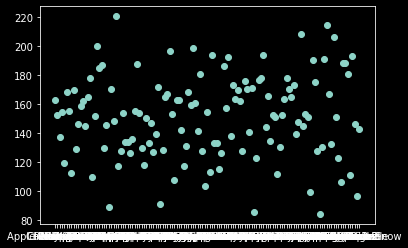

In [6]:
plt.scatter(final_arr.keys(), final_arr.values())
# we can see how closer the values are...

#### **Testing**

In [7]:
test_folder_url = "/home/yaadava_kishore/Desktop/Data_Analytics_1_b/Fruit-Images-Dataset/Test"
test_files_list = {}
for i in os.listdir(test_folder_url):
    test_files_list[f"{os.path.join(test_folder_url,i)}"] = os.listdir(os.path.join(test_folder_url,i))

In [8]:
flatten_test = {}
for dir_path, files in test_files_list.items():
    img_arr_test = []
    for file in files:
        img = cv2.imread(os.path.join(dir_path, file))
        img_arr_test.append(img.flatten().mean())
    flatten_test[dir_path.split("/")[-1]] = img_arr_test

In [9]:
# import copy
# fla = copy.deepcopy(flatten_test)

In [10]:
fla={}
comp = np.round(list(final_arr.values()), decimals=3)
fold = np.array(list(final_arr.keys()))
for cat, vals in flatten_test.items():
    predicted = []
    np.round_(vals, decimals=3)
    for val in vals:
        idx = np.argmin(np.abs(comp-val))
        predicted.append(fold[idx])
    fla[cat] = predicted


In [11]:
from collections import Counter
for cat, val in fla.items():
    print("total test_samples", len(val), " of ", cat)
    myCounter = Counter(val)
    x = list(myCounter.items())
    print("main category: ", cat, ", total_different_types: ",
          len(x), ", correctly_predicted: ", myCounter[cat])
    # break


total test_samples 234  of  Cauliflower
main category:  Cauliflower , total_different_types:  34 , correctly_predicted:  2
total test_samples 164  of  Apple Granny Smith
main category:  Apple Granny Smith , total_different_types:  21 , correctly_predicted:  0
total test_samples 164  of  Rambutan
main category:  Rambutan , total_different_types:  45 , correctly_predicted:  0
total test_samples 246  of  Cherry Rainier
main category:  Cherry Rainier , total_different_types:  37 , correctly_predicted:  1
total test_samples 164  of  Nectarine
main category:  Nectarine , total_different_types:  34 , correctly_predicted:  10
total test_samples 166  of  Kaki
main category:  Kaki , total_different_types:  38 , correctly_predicted:  2
total test_samples 166  of  Raspberry
main category:  Raspberry , total_different_types:  26 , correctly_predicted:  7
total test_samples 164  of  Pomegranate
main category:  Pomegranate , total_different_types:  37 , correctly_predicted:  7
total test_samples 178 